![](https://blog.socialcops.com/wp-content/uploads/2016/07/OG-MachineLearning-Python-Titanic-Kaggle.png)

# Titanic EDA & Prediction 

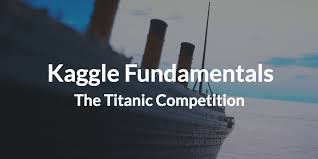

## So According to me, if you are newbie in DS, then you should start take part in titanic competition, dataset is very challenging, so this kernels is based on my opinion regarding dataset, so now you can enjoy EDA & Prediction

In [ ]:
import numpy as np 
import pandas as pd 

import os
print(os.listdir("../input"))

In [ ]:
dataset = pd.read_csv('../input/train.csv')

In [ ]:
dataset.head()

# So we need to first study of our data

## 1 - PassengerId - Column does not depend on survive   
## 2 - Pclacss - it's needed for prediction      [--Select--]
## 4 - Name - it's not useful for our prediction
## 5 - Sex - Male/ Female depends on survived because female always get a first chance   [--Select--]
## 6 - Age - Age depends on survivde  [--Select--]
## 7 - SibSp - Having siblings/spouse depends on survived  [--Select--]
## 8 - Parch - Number of childs depends on survived  [--Select--]
## 9 - Ticket - Ticket not create impact on survived
## 10 - Fare - Fare create impact om survived because who have a costly tickets ,that person have more chance to get first in lifeboat  [--Select--]
## 11 - Cabin - Cabin have more null values and its not create any impact on survived
## 12 - Embarked - it's create impact on survived  [--Select--]

In [ ]:
##Let's create funcition for barplot
def bar_chart(feature):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(15,7))
    
bar_chart('Sex')

In [ ]:
##Now let's see a barplot of Pclass
bar_chart('Pclass')

In [ ]:
##Let's see for SibSp
bar_chart('SibSp')

In [ ]:
##Let's see for Parch
bar_chart('Parch')

In [ ]:
##Let's plot the Embarked
bar_chart('Embarked')

In [ ]:
##Now let's make a list of our features matrix list
features= [ 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
##Let's devide in X and Y
x = dataset[features]
y = dataset['Survived']

In [ ]:
x.isnull().sum()

In [ ]:
##Now fill the null values
x['Age'] = x['Age'].fillna(x['Age'].median())
x['Embarked']= x['Embarked'].fillna(x['Embarked'].value_counts().index[0])

In [ ]:
###Now let's enocde categorical values 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
x['Sex'] = LE.fit_transform(x['Sex'])
x['Embarked'] = LE.fit_transform(x['Embarked'])

In [ ]:
##Now everything is ok 
##Now let's Split the Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state =0)

In [ ]:
##Now we fit our model
from xgboost import XGBClassifier
classifier = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8, 
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 10,
                    nthread= 4,
                    random_state= 2,
                    silent= True)
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

In [ ]:
##Now take the test data for prediction
test_data = pd.read_csv('../input/test.csv')
test_x = test_data[features]

In [ ]:
##Let's fill values
test_x['Age'] = test_x['Age'].fillna(test_x['Age'].median())
test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].median())

In [ ]:
##Let's enocde categorical values
test_x['Sex'] = LE.fit_transform(test_x['Sex'])
test_x['Embarked'] = LE.fit_transform(test_x['Embarked'])

In [ ]:
##Now we predict the values
prediction = classifier.predict(test_x)

In [ ]:
##Now according to rules we have to store a prediction in csv file
output = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived': prediction})
output.to_csv('submission.csv', index=False)
output.head()
##Submission.csv is a file which we have to submit in a competition

# Upvote my kernel if you like it:), and share your opinion and suggestions in commentbox